# Introduction

From [linear algebra](../linear_algebra/linear_systems.ipynb), we learnt how to solve linear equations.
That chapter also serves are pre-requisite to all our notations.

However, suppose that we were made to solve inequalities too.

Our problem (which we call the **linear programming problem, LP**) would be in the form of:
$$
\min _{x \in \mathbb{R}^n} f(\mathbf{x}) \\
\text{such that:} \mathbf{A_1x} = \mathbf{b_1} \\
\mathbf{A_2 x} \leq \mathbf{b_2} \\
\mathbf{A_3 x} \geq \mathbf{b_3}
$$

## Application

Suppose that I wish to maximize my happiness.
I have a certain amount of different types of resources: time, energy, hunger and stress level.
And I have certain activities which I can perform which can increase my happiness, at the cost of certain amount of resource.

The following is a tabulation of the data:

| Resource/Activity | Playing games | Studying | Eating | Napping | Amount available |
| --- | --- | --- | --- | --- | --- |
| Time | 2 | 1 | 0.5 | 1 | 8 |
| Energy | 2 | 1 | 0.5 | -3 | 4 |
| Hunger | 1 | 1 | -2 | 0.5 | 6 |
| Stress | -3 | 2 | 0 | -1 | 3 |
| Happiness | 2 | 1 | 0.5 | 0.5 | |

Notice that while most activities uses resources, certain activities can also produce resource.

The question becomes, what is the best allocation of activities such that I am able to maximize my happiness?

## Graphical representation

### Normal vector

Suppose that we have a vector $\mathbf{c}$, and variable $\mathbf{x}$.
Notice that $\mathbf{c}$ points in the direction of increasing $\mathbf{c}^T \mathbf{x}$

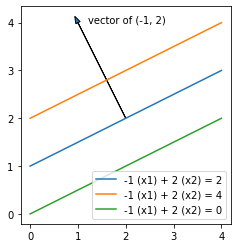

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = np.array([-1, 2])
x = np.arange(5)

plt.plot(x, (2 + x) / 2, label="-1 (x1) + 2 (x2) = 2")
plt.plot(x, (4 + x) / 2, label="-1 (x1) + 2 (x2) = 4")
plt.plot(x, (0 + x) / 2, label="-1 (x1) + 2 (x2) = 0")
plt.arrow(2, 2, -1, 2, head_width=0.1)
plt.annotate("vector of (-1, 2)", (1.2, 4))
plt.legend()
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

### Halfspace

Suppose we have an inequality of the form $\mathbf{a}^T_i \mathbf{x} \leq \mathbf{b}_i$

Notice that this can be represented as a **halfspace**, as shown graphically below.

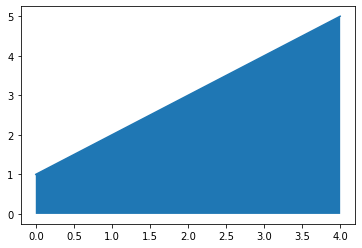

In [2]:
from module.utility import plot_halfspace

plot_halfspace(np.linspace(0, 4), " -2x1 + 2x2 = 2")
plt.show()

In this case, the shaded region represents the values where $\mathbf{a} ^T_i \mathbf{x} \leq \mathbf{b}_i$, $\mathbf{a} = (-1, 2), \mathbf{b} = (2)$

Notice that we can always convert the inequality to a $\leq$ by multiply both sides by $-1$, and we call $\mathbf{a}_i$ the outward normal vector.

And a set of inequality will give us an intersection of halfspaces.

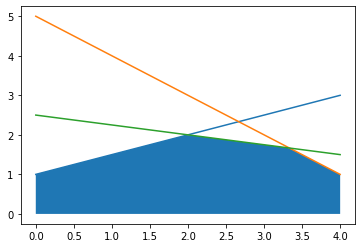

In [3]:
plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
plt.show()

## Linear programming
A linear programming problem is in the form of

$$
\min (\text{ or} \max) _{x \in \mathbb{R}^n} \mathbf{c}^T \mathbb{x} \\
\text{such that:} \mathbf{a_ix} = \mathbf{b_i} \text{ for some }i \\
\mathbf{a_i x} \leq \mathbf{b_i} \text{ for some } i\\
\mathbf{a_i x} \geq \mathbf{b_i} \text{ for some } i \\
x_j \geq 0 \text{ for some } j \\
x_j \leq 0 \text{ for some } j \\
x_j \in \mathbb{R} \text{ for some } j
$$

$\mathbf{c}^T \mathbf{x}$ is the **objective function**

The $x_i$ are called **decision variables**.

Variables where $x_j \in \mathbb{R}$ are free/unrestricted.

Any vector $\mathbb{x}$ that satisfy all the contraints is called **feasible solution**

For example, if the constraint is $x_1 + x_2 \leq 2$, then $(0, 1)$ is feasible, while $(3, 1)$ is not.

The **feasible set/feasible region** is the set of all feasible solutions.

A feasible solution $\mathbf x^*$ that minimizes/maximizes the objection function is an **optimal feasible solution**

$\mathbf{c}^T \mathbf{x}^*$ is the **optimal objective value/optimal cost**

A minimization problem has **unbounded cost** if the optimal cost is $-\infty$ (similarly for maximization)

### Optimization

Since we know that $\mathbf c$ points in the direction of increasing objective function, we can simply traverse in the direction of $-\mathbf {c}$ while staying in the feasible region (vice versa for maximization).

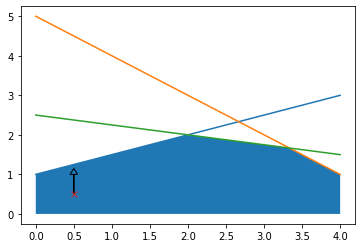

In [4]:
ax = plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
ax.arrow(0.5, 0.5, 0, 0.5, head_width=0.1)
ax.plot(0.5, 0.5, "x")
plt.show()

Suppose that our objective function is $0(x_1) + 1(x_2)$.

We consider the point $(0.5, 0.5)$.
Since $\mathbf c = (0, 1)^T$, we would move upwards, until we hit the border.

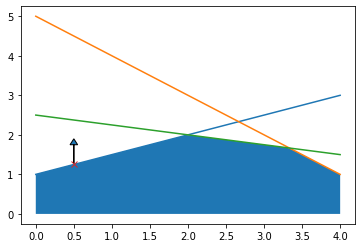

In [5]:
ax = plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
ax.arrow(0.5, 1.25, 0, 0.5, head_width=0.1)
ax.plot(0.5, 1.25, "x")
plt.show()

Notice that we can still increase our objective value, by moving in the positive $x_1$ axis.
We can imagine it as pulling the point upwards, while it is bounded by the border of the halfspaces.
It is intuitive that this motion would slide the points rightwards.

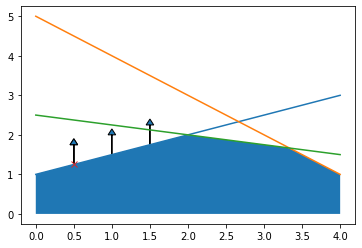

In [6]:
ax = plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
ax.arrow(0.5, 1.25, 0, 0.5, head_width=0.1)
ax.arrow(0.5, 1.25, 0, 0.5, head_width=0.1)
ax.arrow(1, 1.5, 0, 0.5, head_width=0.1)
ax.arrow(1.5, 1.75, 0, 0.5, head_width=0.1)
ax.plot(0.5, 1.25, "x")
plt.show()

And it is also apparent that this motion would stop at the "corner" of the constraints, as per below.
From here, there is no motion we can do to improve the objective value, and this is has to be optimal.

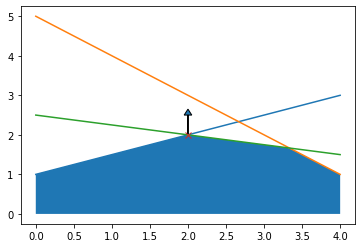

In [7]:
ax = plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
ax.arrow(2, 2, 0, 0.5, head_width=0.1)
ax.plot(2, 2, "x")
plt.show()

### Types of solutions
There are few types of solutions possible for a linear problem

* Unique solution
* Multiple optimal solution
    * Set of optimal solutions can be bounded or unbounded
* Optimal cost unbounded
    * Cost $= -\infty$ for minimization problems
* Infeasible
    * No feasible solution
    * Cost $= \infty$ for minimization problems

In practical problems, unbounded cost indicates that we are missing some constraints, since real life metrics generally cannot be infinite.
Similarly, infeasiblity indicates some inconsistencies in the constraints that we set.

### Standard form
We can establish a standard form for LP for ease of discussions.

The standard form is such that all constraints are written in the form of:


$$
\min  \mathbf{c}^T \mathbb{x} \\
s.t \quad
\mathbf{Ax} = \mathbf{b} \\
\mathbf x \geq \mathbf 0 
$$

Hence, it needs:
1. Minimization objective
2. Equality constraints
3. Non-negative variables

The steps to convert it is as follows:
1. Eliminate inequality constraints
    * Introduce slack variables
2. Eliminate non-positive and free variables
    * If $x_i \leq 0$, we replace $x_i$ by $-x_i^-$
    * If $x_i$ is free, we replace it with $x_i^+ - x_i^-$

## Extreme points

[Previously](#Optimization), we have seen that we can find solutions to the problem at corners of the halfspaces.

This makes some intuitive sense as we wish to maximize the tightness of the constraint utilize.
To formalize these locations, we have the following 3 definitions of corner points:

### Geometric definitions

*A point $\mathbf x^*\in P$ is an extreme point if for any two points $\mathbf{y,z} \in P$ and some scalar $\lambda \in (0,1)$ such that $\mathbf x^* = \lambda \mathbf y + (1- \lambda) \mathbf z$, then $\mathbf y = \mathbf z = \mathbf x^*$.*

In layman terms, it means that you won't be able to find 2 distinct points that are on "opposite sides" of $x^*$.

A point $\mathbf x^* \in P$ is a vertex of $P$ if there is a $\mathbf c \in \mathbb R ^n$ such that $\mathbf c ^ T x^* > \mathbf c ^T \mathbf y$ for all $\mathbf y \in P \setminus \{x^* \}$

Note that the above 2 definitions are not really important for us, they are just here for completeness.
It is because it is hard to work with the geometric definitions computationally.

Also, it becomes hard to visualize with the geometric approach once we have higher dimensions, for example, our [application](#Application) has 4 dimensions.

###  Algebraic definition

Suppose that $\mathbf a_i ^T x^* = b_i$ for some constraint.
Then, we call this constraint as **active/binding/tight** at $x ^*$

Constraints $\mathbf a_i ^T \mathbf x^* \geq b_i$ are said to be linearly independent if the corresponding vectors $\mathbf a _i$ are [linearly independent](TODO)

$\mathbf x^*$ is a **basic feasible solution** (BFS) of a polyhedron $P$ if $\mathbf x^* \in P$ and $n$ linearly independent constraints are active at $\mathbf x^*$

If the above is true, except that we don't know if $\mathbf x^* \in P$, then it is just simply a **basic solution**.

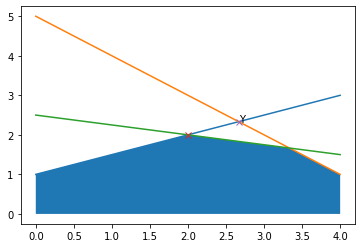

In [8]:
ax = plot_halfspace(
    np.linspace(0, 4), " -1x1 + 2x2 = 2", "  2x1 + 2x2 = 10", "0.5x1 + 2x2 = 5"
)
ax.plot(2, 2, "x")
ax.plot(8 / 3, 7 / 3, "x")
ax.annotate("Y", (8 / 3, 7 / 3))
plt.show()

Note that for a polyhedron, extreme points $\Leftrightarrow$ vertex $\Leftrightarrow$ BFS

<span hidden> TODO: add proof </span>

Once again, $(2,2)$ is an corner points graphically.
And we can see that the constraints are:
$$
-x_1 + 2x_2 = 2 \\
2x_1 + 2x_2 = 10 \\
\frac{1}{2}x_1 + 2x_2 = 5
$$

Subbing $(2, 2)$ inside, we get:

$$
-2 + 2(2) = 2 \\
2(2)+ 2(2) = 8 \neq 10\\
\frac{1}{2}(2) + 2(2) = 5
$$

which agrees with our definition as 2 constraint are satisfied and (we can prove that) they are linearly independent. 
Also to note that the 2 tight constraints are also the halfspaces that are in contact with the corner.

Now, notice that at points $Y$:

$$
-(8/3) + 2(7/3) = 2 \\
2(8/3)+ 2(7/3) = 10\\
\frac{1}{2}(8/3) + 2(7/3) = 16/3 \neq 5
$$

which means it is an infeasible basic solution as it is $\not \in P$.

### Degeneracy
A basic solution is degenerate is more than $n$ constraints are active at the same time.

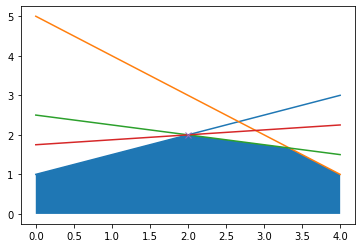

In [9]:
ax = plot_halfspace(
    np.linspace(0, 4),
    "  -1x1 + 2x2 = 2",
    "   2x1 + 2x2 = 10",
    " 0.5x1 + 2x2 = 5",
    "-0.5x1 + 4x2 = 7",
)
ax.plot(2, 2, "x")
plt.show()

Now that we added a new constraint, notice that this new constraint is not linearly independent from the 1st and the 3rd.
Hence, $(2, 2)$ now has more that $n$ contraints active, thus making it degenerate.
Degeneracy is of interest because it [affects the behaviour of our LP algorithms](TODO).

Since there are a finite number ($m$) of constraints, there will be a finite number ($C^m_n$) of basic solutions.

Degeneracy indicates that some constraints are redundant.
For example, we can see that the red constraint is redundant as it is already covered by the green and blue constraint above.

### Solutions

We say a vector $\mathbf x ^* \in \mathbb R^n$ is a basic solution of a standard form polyhedron ($n \times m$ matrix) if:
1. $\mathbf {Ax}^* = \mathbf b$
2. There exists indices $B_1, B_2, \dots, B_m$ such that:
    * The columns $\mathbf A _{B_1}, \mathbf A _{B_2}, \dots \mathbf A _{B_m}$ are linearly independent
    * $x ^ * _i = 0$ for all $i \notin \{B_1, B_2, \dots, B_m\}$

We call the variables $x_{B_1},x_{B_2},\dots x_{B_m}$ as **basic variables**, and the others are **nonbasic variables**.

If we select all the columns in $\mathbf A$ corresponding to the indices $B_1, \dots, B_n$ of a basic solution, and concatenate them together, we obtain $m$ linearly independent columns call a **basis matrix**.


#### Examples

$$
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0 & 0 \\
0 & 1 & 6 & 0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix}
\mathbf x
=
\begin{pmatrix}
8 \\ 12 \\ 4 \\ 6
\end{pmatrix},
\mathbf x \geq 0
$$

Suppose we consider the basic solution associated with columns $4,5,6,7$.

The basis matrix is simply
$$
\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1 
\end{pmatrix}
$$
which is associated with the variables $x_4, x_5, x_6, x_7$

Then we get the following solution:
$$
x_1 = x_2 = x_3 = 0 \\
x_4 = 8 \\
x_5 = 12 \\
x_6 = 4 \\
x_7 = 6
$$

Thus, this is a BFS.

---

Suppose we consider the basic solution associated with columns $2,1,3,4$.


The basis matrix is simply
$$
\begin{pmatrix}
 1 & 1 & 2 & 1 \\
 1 & 0 & 6 & 0 \\
 0 & 1 & 0 & 0 \\
 1 & 0 & 0 & 0 
\end{pmatrix}
$$
which is associated with the variables $x_2, x_1, x_3, x_4$

We get the following system of equations:
$$
x_2 + x_1 + 2x_3 +x_4 = 8 \\
x_2 + 6x_3  = 12 \\
x_1 = 4\\
x_ 2 = 6 
$$

Solving the system of equations will lead to the following solution:
$$
x_1 = 4\\
x_2 = 6 \\
x_3 = 1 \\
x_4 = -4 \\
x_5 = x_6 = x_7 = 0
$$

However, since $x_4 = -4 < 0$ , this is not a feasible solution.

Note that is is possible for two different base to lead to the same solution.

### Adjacency

Two distinct basic solutions are **adjacent** if and only if either of the below holds:
* the corresponding bases share all but 1 basic column
* there are a common $n-1$ (but not $n$) linearly independent constraints that are active for both of them

For example, the basic solution corresponding to the indices $1,2,3,4$ would be adjacent to one that has indices $3,2,1,5$

This definition of adjacency also leads to adjacency geometrically too.

### Line containment

Suppose that our polyhedron contains an infinite line.
Geometrically, this means that it cannot contain an extreme point, since it is not bounded.
Formally, it a polyhedron $P$ contains a line if there exists some $\mathbf x^* \in P$ and a nonzero $d \in \mathbb R^n$ such that $\mathbf x^* + \lambda \mathbf d \in P$ for all $\lambda \in \mathbf R$.

#### Theorem
The following are equivalent:
1. $P$ does not contain a line
2. $P$ has a BFS
3. $P$ has $n$ linearly independent constraints

<span hidden> TODO: Add proof </span>

#### Theorem
Consider the LP
$$
\min \mathbf c ^ T \mathbf x \\
s.t \quad \mathbf x \in P
$$

If $P$ has at least 1 BFS, and the LP has an optimal solution, then there must exists an optimal solution that is a BFS.

This follows intuitively from our geometric perspective, where some corner must contain the optimal solution.

<span hidden> TODO: Add proof </span>